## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!pip install tensorflow_addons
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [2]:
!nvidia-smi

Sat Feb 15 13:29:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive-logo"/></center>
#@markdown <center><h3>Mount GDrive to /content/drive</h3></center><br>
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive!
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Mounted at /content/drive


In [7]:
!unzip -u "/content/drive/MyDrive/Fruit_detection.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Fruits-detection/train/labels/6b179b76bb1a82b1_jpg.rf.25cb4f1d15cf69cfc930c2fcd75c3df7.txt  
  inflating: Fruits-detection/train/labels/6b179b76bb1a82b1_jpg.rf.8198f0021bcc4229646b73b71ec97c81.txt  
  inflating: Fruits-detection/train/labels/6b61ba6f4b63c410_jpg.rf.437766cf64549dafe897c657ac30b170.txt  
  inflating: Fruits-detection/train/labels/6b61ba6f4b63c410_jpg.rf.4938f9935da3999d4c08d00a80280134.txt  
  inflating: Fruits-detection/train/labels/6b94ed4e192dae14_jpg.rf.3440485e94feb5009fcafdedc93b0bf1.txt  
  inflating: Fruits-detection/train/labels/6b94ed4e192dae14_jpg.rf.b57047cb7bd63a09fc3e22a045c5941d.txt  
  inflating: Fruits-detection/train/labels/6b9b3d3309f031f6_jpg.rf.8820b30dc0dfe27b867ba24cec78da8a.txt  
  inflating: Fruits-detection/train/labels/6b9b3d3309f031f6_jpg.rf.becad7fe56b6ad24b0e43f1161523e2e.txt  
  inflating: Fruits-detection/train/labels/6ba1a6e366585a07_jpg.rf.051578a52469b8054fab578200213632.t

In [ ]:
# Install the specific version (8.2.103) of the Ultralytics YOLOv8 library
# YOLOv8 is a deep learning model used for object detection, segmentation, and classification
# The '-q' flag is used to suppress unnecessary output, making the installation cleaner
!pip install ultralytics==8.2.103 -q
# Import the 'display' module from IPython, which provides utilities for controlling notebook output
from IPython import display

# Clear the current output of the Jupyter Notebook cell (removes installation logs)
# This helps in maintaining a clean interface
display.clear_output()
# Import the 'ultralytics' library, which includes YOLOv8 models and utility functions
import ultralytics

# Run system checks to ensure that:
# - The correct YOLOv8 version is installed
# - Required dependencies (like PyTorch, OpenCV) are available
# - GPU (CUDA) support is properly configured for acceleration
ultralytics.checks()


Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.2/112.6 GB disk)


In [12]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
# Define a multi-line string containing dataset information in YOLO format
text = """
train: /content/Fruits-detection/train
val: /content/Fruits-detection/valid

# number of classes
nc: 6

# class names
names: ['Apple','Banana','Grape','Orange','Pineapple', Watermelon]
"""
# Open (or create) a file named "data.yaml" in write mode ('w')
# This file will store dataset configuration for YOLO training
with open("data.yaml", 'w') as file:
    file.write(text)  # Write the dataset configuration to the file


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=100 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 221MB/s]
New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

In [15]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1739626932.64b110f28421.4211.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					    train_batch40050.jpg  weights
P_curve.png					    train_batch40051.jpg
PR_curve.png					    train_batch40052.jpg


/content


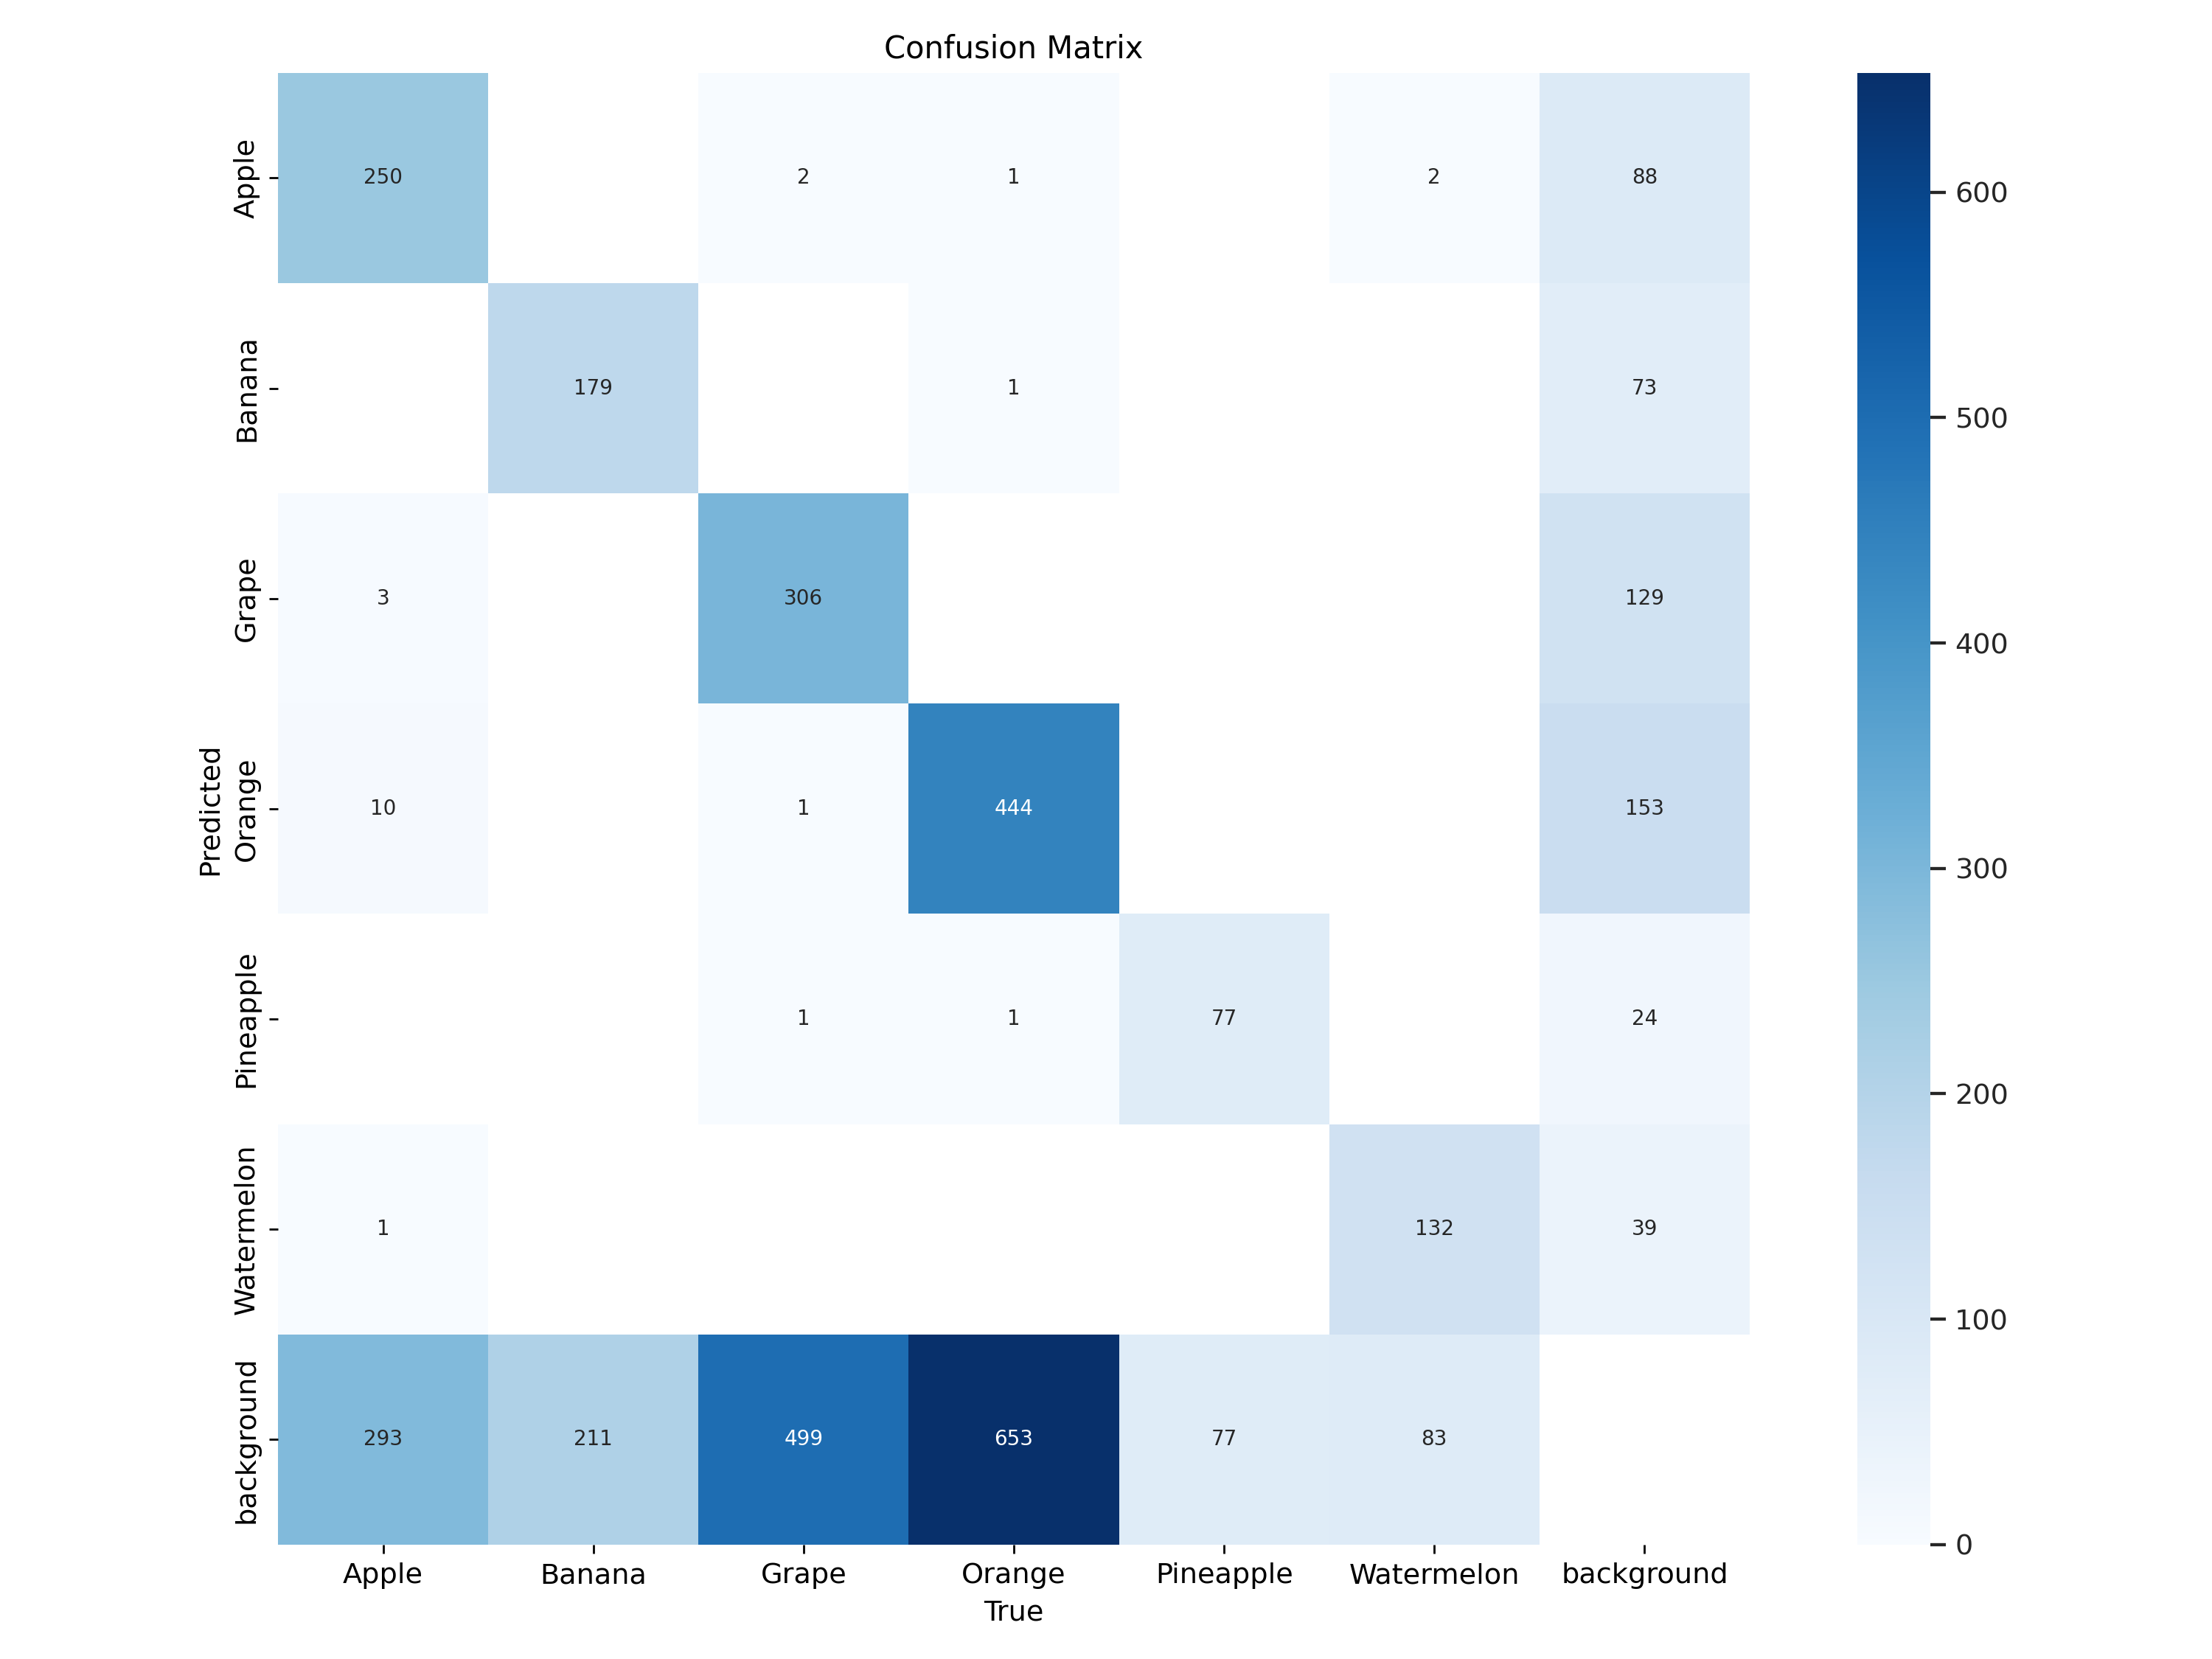

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


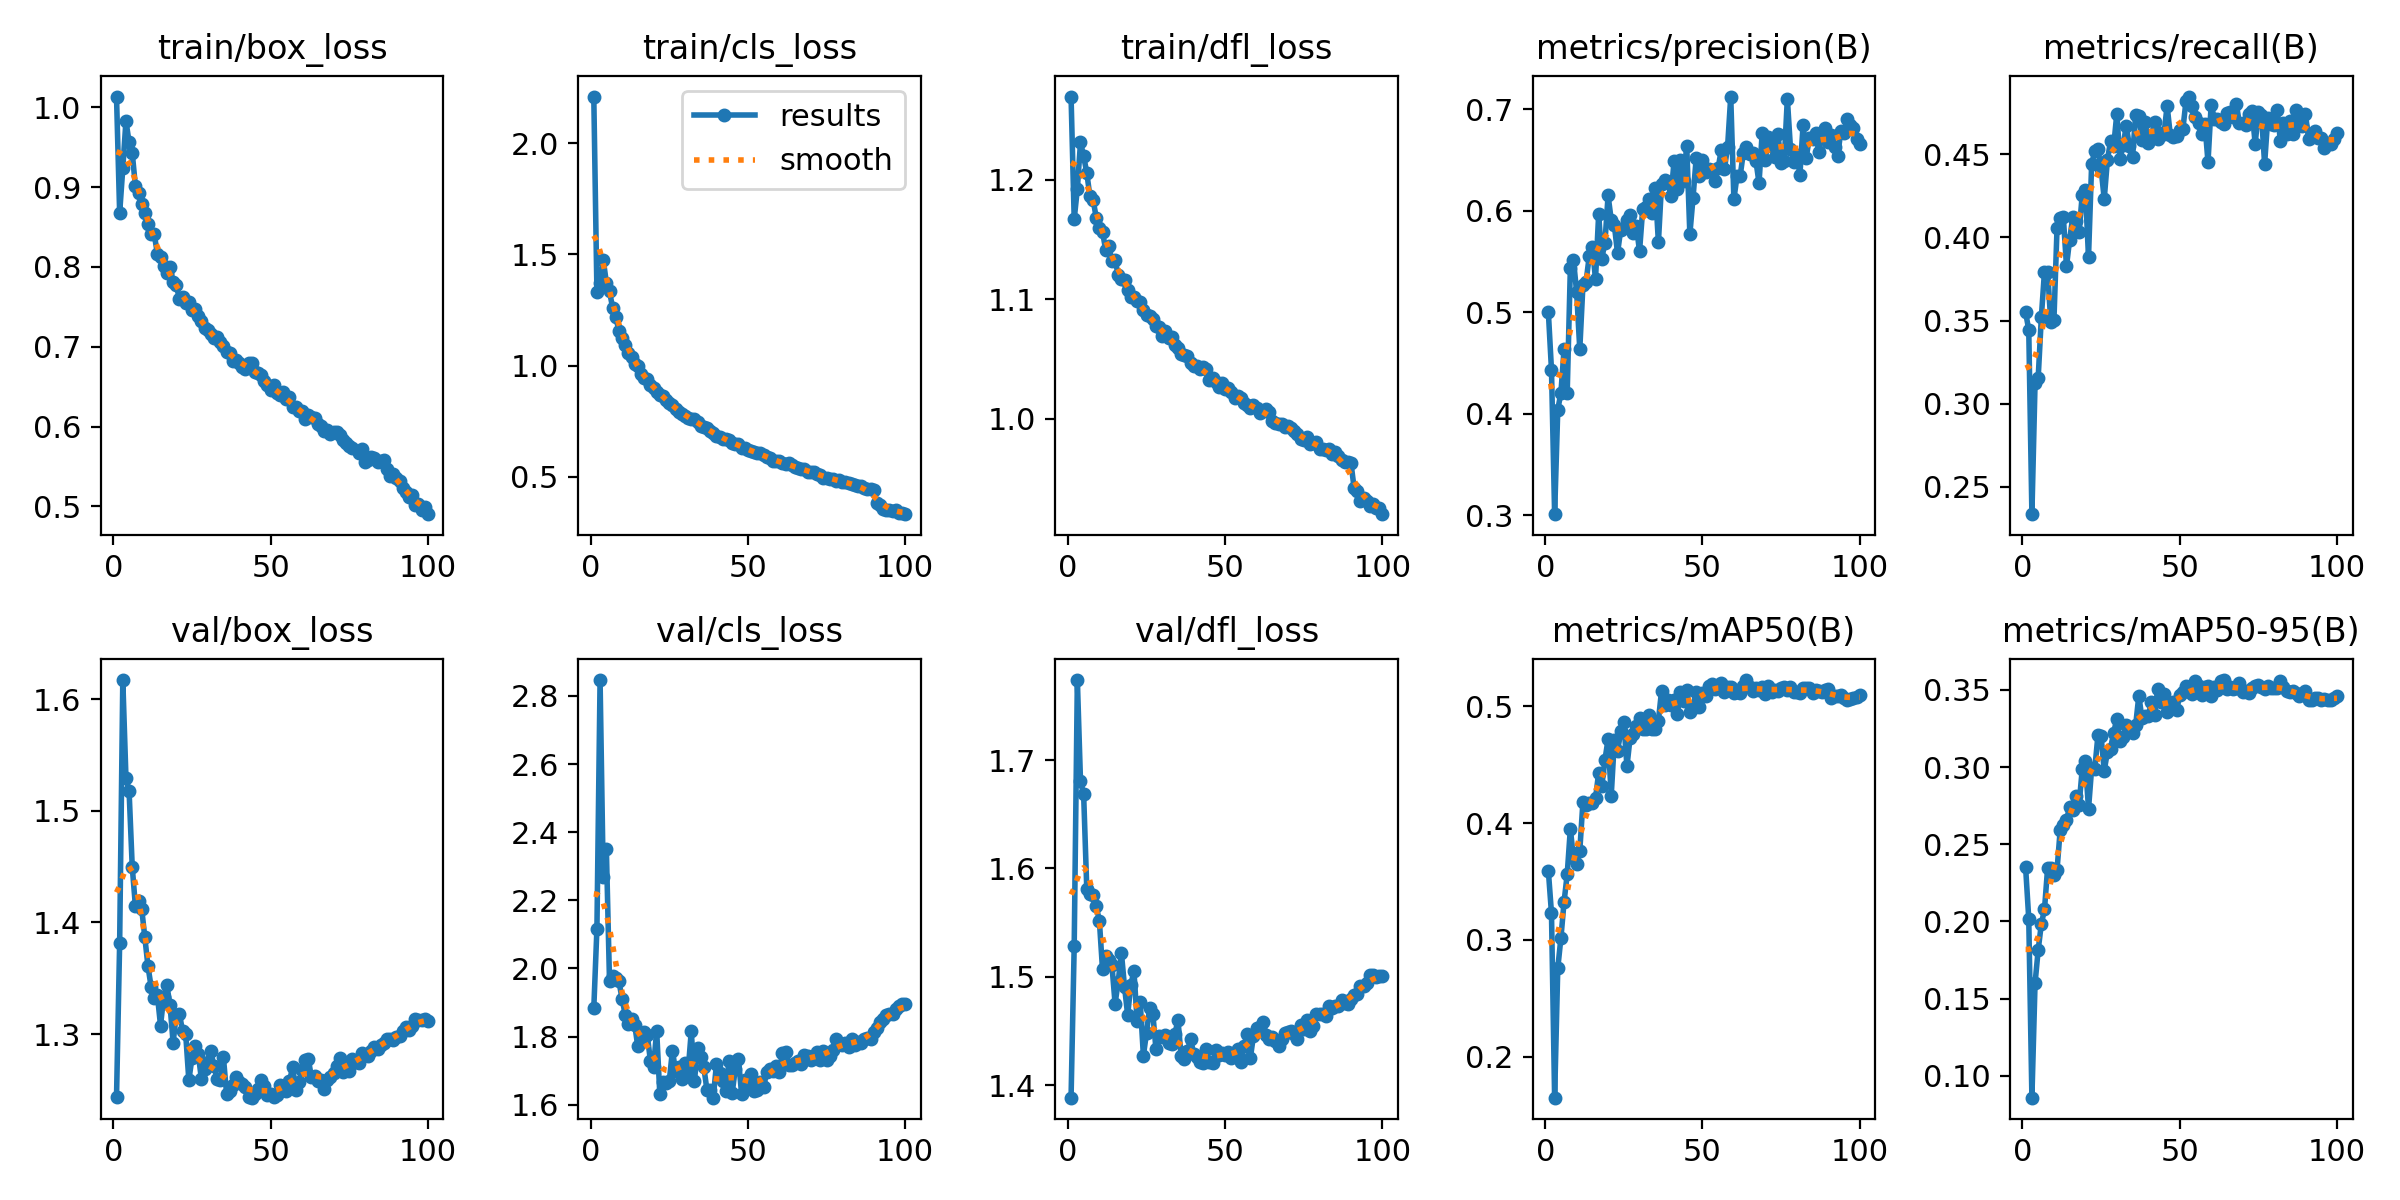

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


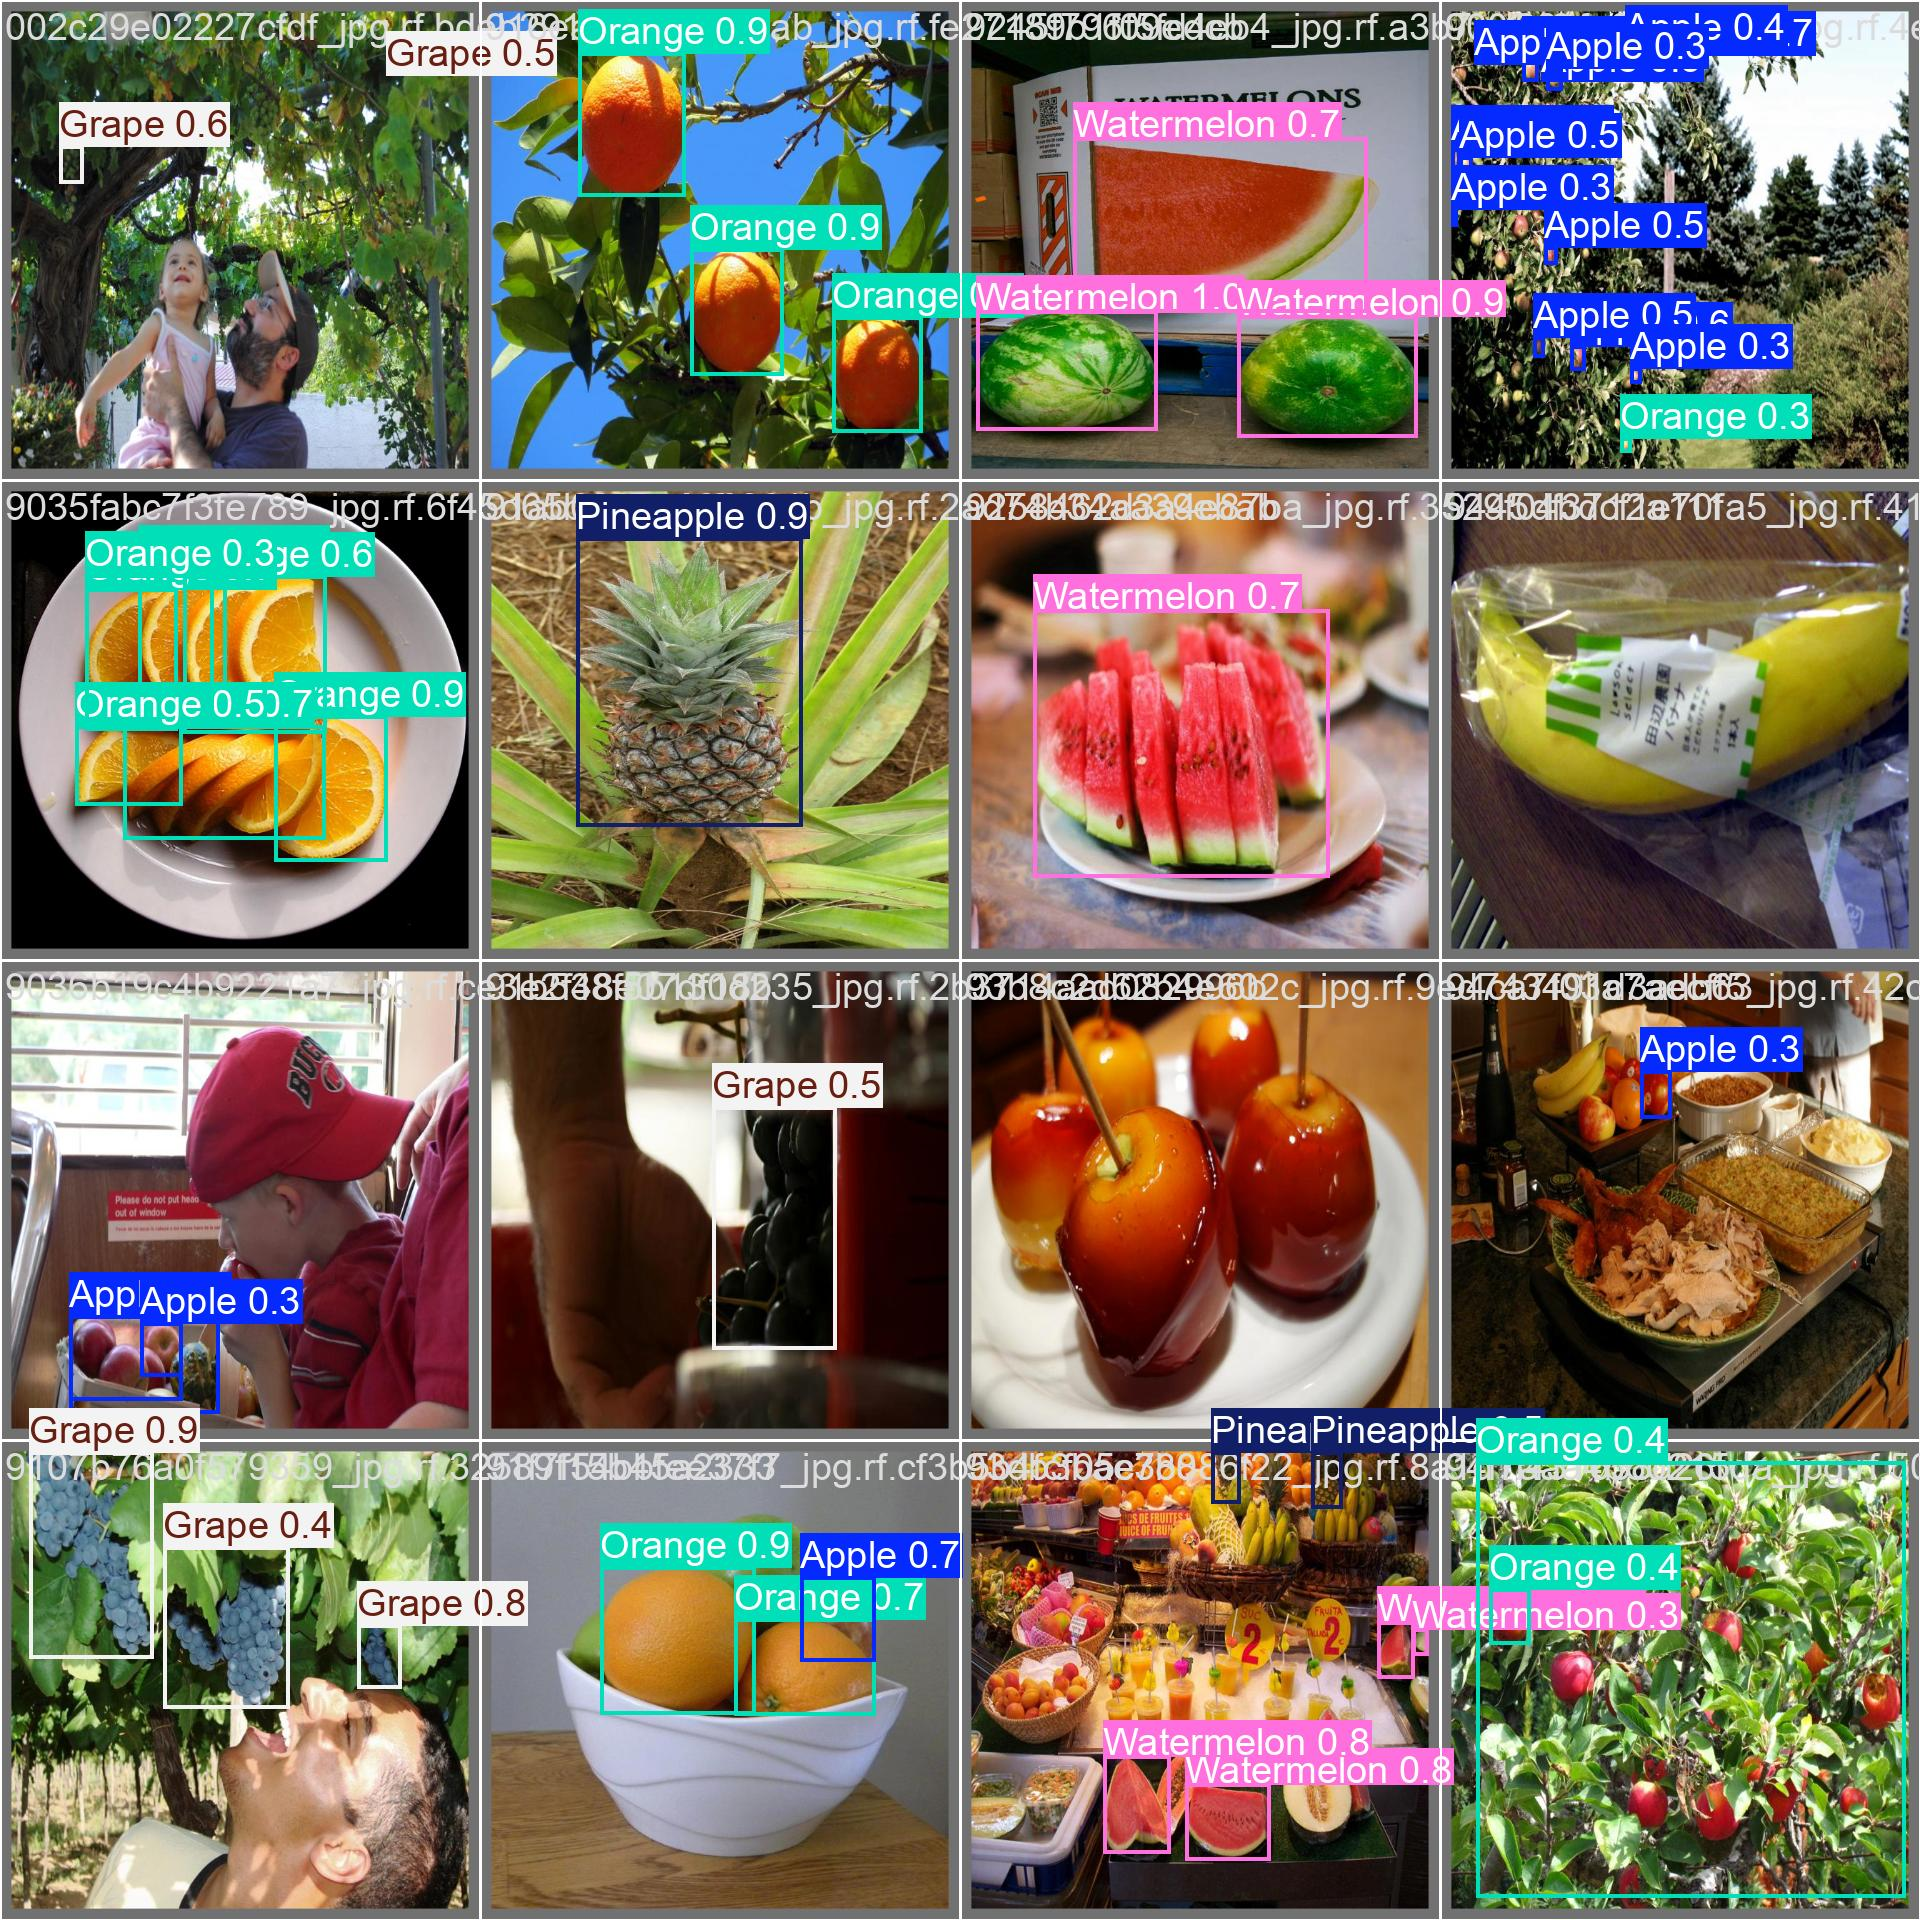

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Fruits-detection/valid/labels.cache... 914 images, 0 backgrounds, 0 corrupt: 100% 914/914 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Fruits-detection/valid/images/3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 58/58 [00:13<00:00,  4.21it/s]
                   all        914       3227      0.663      0.468      0.522      0.356
                 Apple        188        557      0.675      0.462      0.538      0.381
                Banana        167        390      0.629      0.456       0.51      0.304
                 Grape        199        809      0.631      0.375      0.419      0.279
                Orange        197       1100      0.672      0.4

## Inference with Custom Model

In [21]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/Fruits-detection/test/images' save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/457 /content/Fruits-detection/test/images/000aee0af66d4237_jpg.rf.6b99256606e5b7a1ede8b833a87196a7.jpg: 640x640 1 Watermelon, 16.3ms
image 2/457 /content/Fruits-detection/test/images/000d9c59687b509b_jpg.rf.c338360b3dfe1953a5d266ee861d7e79.jpg: 640x640 1 Apple, 16.3ms
image 3/457 /content/Fruits-detection/test/images/000e4e7ed48c932d_jpg.rf.8233751e16b32b9470e45c6135c8f8c7.jpg: 640x640 2 Oranges, 16.3ms
image 4/457 /content/Fruits-detection/test/images/00149fd0a01cc623_jpg.rf.68e2b35f1bc31938c4a10d32a8f5340e.jpg: 640x640 1 Orange, 16.2ms
image 5/457 /content/Fruits-detection/test/images/006e0a3d99d16d60_jpg.rf.258f5af33beab4d59918218c732de430.jpg: 640x640 1 Grape, 16.2ms
image 6/457 /content/Fruits-detection/test/images/0074691e66aa85c0_jpg.rf.2fc1e81bbe5377b89f9c912c52ff7905.jpg: 640x640 1 Banana, 2

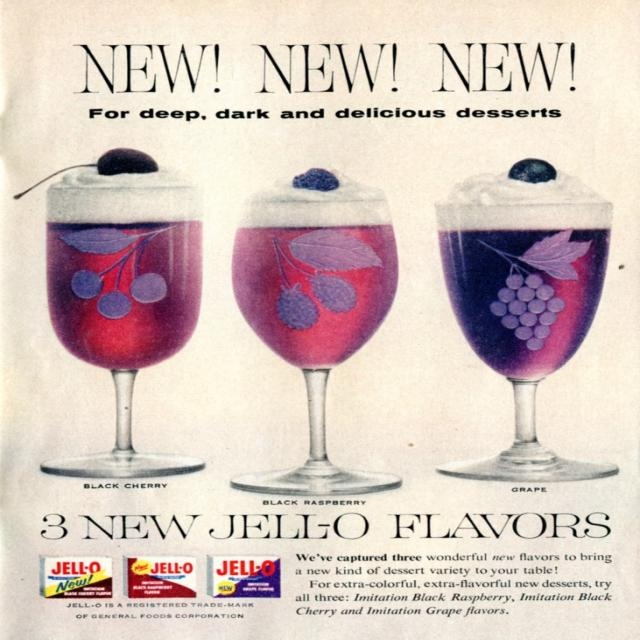

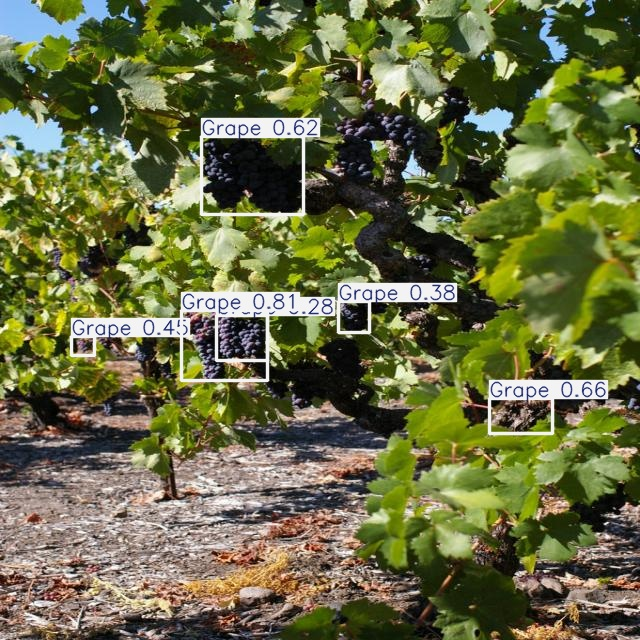

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:2]:
      display(Image(filename=image_path, height=600))
      print("\n")

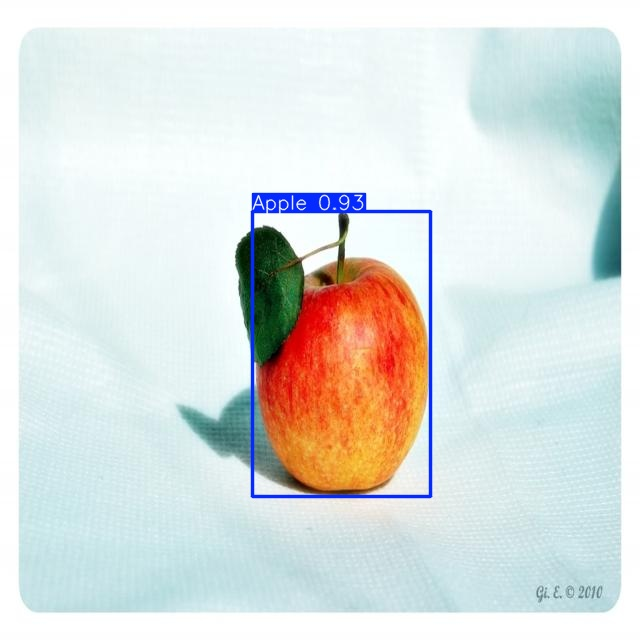

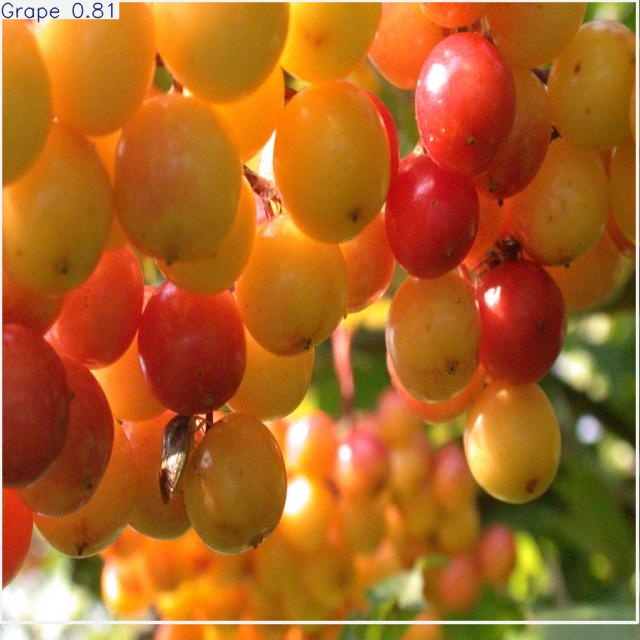

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[2:4]:
      display(Image(filename=image_path, height=600))
      print("\n")